# Business Objective:
### The business problem, following the revenue metrics, is to know which strategies can potentially lead to an increase in sales. This problem is further breakdown into the following specific objectives:
1. Keystone Products
2. Product placement strategy
3. Placement to sell high margin products
4. Separating alternatives
5. Sale on products that can help to sell other products.

<a id="1"></a>
## 1. Exploring Dataset

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from wordcloud import WordCloud
import squarify

# !pip install apyori
from apyori import apriori

In [29]:
data = pd.read_csv('dataset.csv', header = None)
print(data.shape)
data.head()

(7501, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The dataset is a sample that contains list of products purchased by 7500 customers.
- Some customers have only purchased one product whereas maximum 20 products have been purchased by one customer.

<a id="2"></a>
## 2. Exploring Itemset

In [3]:
itemset = []
for i in range(data.shape[0]):
    itemset.append([str(data.values[i,j]) for j in range(data.shape[1])])

`itemset` contains the list of products separately, but, `'nan'` have been inserted wherever the purchase had less than 20 products.

In [4]:
itemset[4]

['mineral water',
 'milk',
 'energy bar',
 'whole wheat rice',
 'green tea',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

Let's create a `cleaned_itemset` from `itemset` having only valid entries to **explore itemset through 'Word cloud', 'Frequency plot', and 'Tree Map'**.

In [5]:
cleaned_itemset = []
for each in itemset:
    for item in each:
        if str(item).lower() != 'nan':
            cleaned_itemset.append(item)
            
print("There are {} unique items.".format(len(set(cleaned_itemset))))

There are 120 unique items.


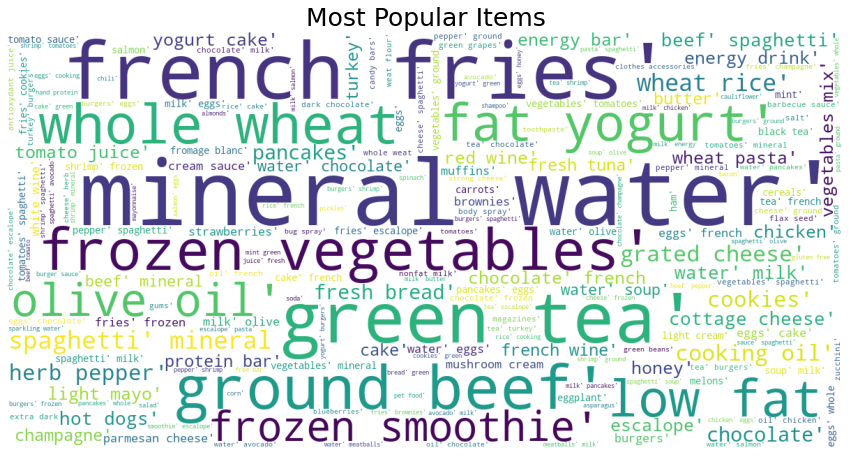

In [13]:
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 600)\
                        .generate(str(cleaned_itemset))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 25)
plt.show()

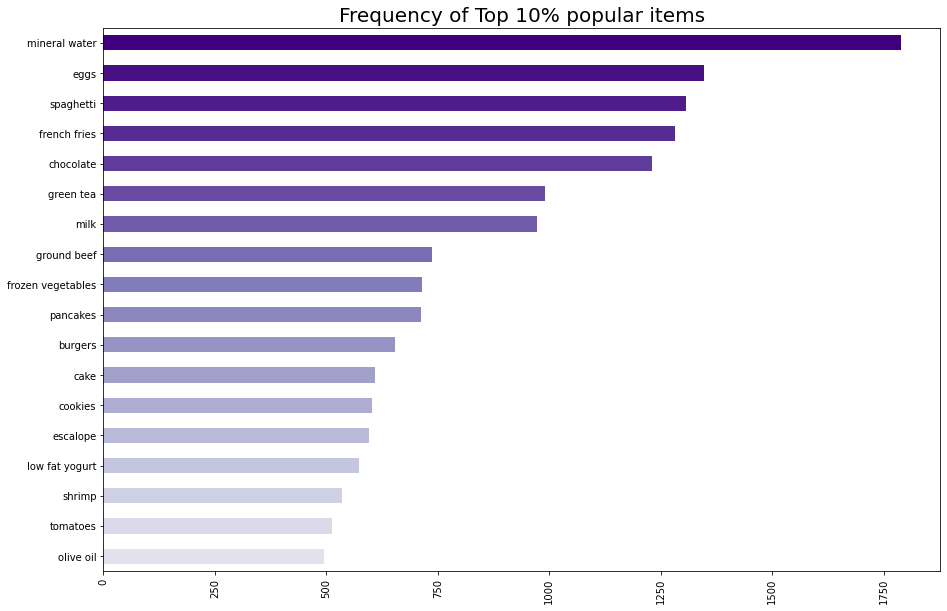

In [7]:
# looking at the frequency of Top 20% popular items
ten = int(0.15*len(set(cleaned_itemset)))
plt.rcParams['figure.figsize'] = (15, 10)
color = plt.cm.Purples(np.linspace(0.2, 1, ten))
pd.DataFrame(cleaned_itemset)[0].value_counts().head(ten).sort_values().plot.barh(color = color)
plt.title('Frequency of Top 10% popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.show()

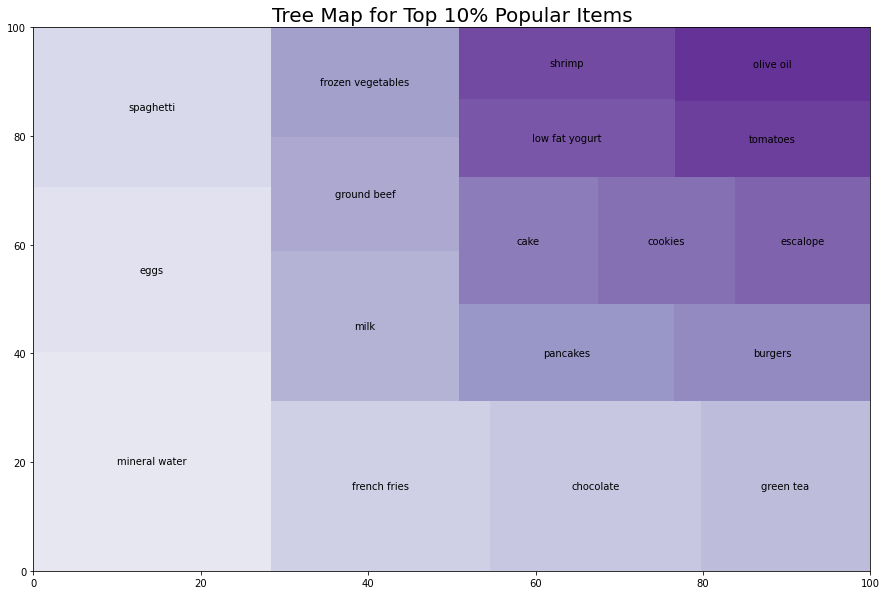

In [8]:
tree = pd.DataFrame(cleaned_itemset)[0].value_counts().head(ten).to_frame()
plt.rcParams['figure.figsize'] = (15, 10)
color = plt.cm.Purples(np.linspace(0.2, 1, ten))
squarify.plot(sizes = tree.values, label = tree.index, alpha=.8, color = color)
plt.title('Tree Map for Top 10% Popular Items', fontsize = 20)
plt.axis()
plt.show()

<a id="3"></a>
## 3. Apriori algorithm

**Association Rule** finds an association between different products in a set and finds frequent patterns in a transaction database such as purchasing behavior analysis. The applications of Association Rule are in Marketing, Basket Data Analysis (or Market Basket Analysis) in retailing, clustering, and classification. **The association rule learning has three popular algorithms – Apriori, Eclat, and FP-Growth.**

This repository is dedicated to the ***Apriori algorithm for Market Basket Analysis. The approach is based on the theory that customers who buy a specific product (or group of products) are more likely to buy another particular product (or group of products).*** 

Market Basket Analysis aims to find relationships and establish patterns across purchases. The relationship is modeled in the form of a conditional algorithm:`IF { itemset ‘A’ } THEN { itemset ‘C’ }`     

`itemset'` : A collection of products/items purchased by a customer     
`antecedent` : The set of products on the *Left*-hand side of the rule     
`consequent` : The set of products on the *Right*-hand side of the rule.

### We will be using apriori function from the library 'apyori'.

**It allows 4 parameter options:**
`min_support`, `min_confidence`, and `min_lift` are the corresponding minimum thresholds for **Support, Confidence, and Lift** to be considered for creating rules. `min_length` is the **minimum number of products in each itemset**.

<img src="scl.jpg" width="750px">

<a id="4"></a>
## 4. Results of the Apriori algorithms

In [9]:
rule_list = apriori(itemset, min_support = 0.003, min_confidence = 0.3, min_lift = 3, min_length = 2)
results = list(rule_list)
print("Total number of rules generated = {}".format(len(results)))

Total number of rules generated = 102


In [10]:
results[0]

RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])

### Explanation for the above resulted rule:
For instance from the first item, we can see that 'mushroom cream sauce' and 'escalope' are commonly bought together. This makes sense since people who purchase 'escalope' which is a boneless meat, also purchases 'mushroom cream sauce' which is commonly used in recipes for 'escalope'.

- The support value for the rule is 0.0057. This means that 'mushroom cream sauce' is purchased in 43 transactions out of all.
- The confidence level for the rule is 0.3 which shows that out of all the transactions that contain 'mushroom cream sauce', 30% of the transactions also contain 'escalope'.
- Finally, the lift of 3.8 tells us that 'escalope' is 3.8 times more likely to be bought by the customers who buy 'mushroom cream sauce' compared to the default likelihood of the sale of 'escalope'.

**But, the rules generated are difficult to read in the above format. Let's get the nice data frame created for it.**

In [11]:
storage = { 'Antecedents':[], 'Consequents': [], 'Support':[], 'Confidence':[], 'Lift':[] }  
for rule in results:
    products = [x for x in rule[0]]
    storage['Antecedents'].append(products[0])
    storage['Consequents'].append(products[1])
    
    storage['Support'].append(round(rule[1], 5))
    storage['Confidence'].append(round(rule[2][0][2], 5))
    storage['Lift'].append(round(rule[2][0][3], 5))

In [28]:
results = pd.DataFrame(storage)
results.head()

,Antecedents,Consequents,Support,Confidence,Lift
0,mushroom cream sauce,escalope,0.00573,0.30070,3.79083
1,pasta,escalope,0.00587,0.37288,4.70081
2,ground beef,herb & pepper,0.01600,0.32345,3.29199
3,ground beef,tomato sauce,0.00533,0.37736,3.84066
4,shrimp,pasta,0.00507,0.32203,4.50667
